In [209]:
import pandas as pd
df = pd.read_csv('survey_results_public.csv')
schema_df = pd.read_csv('survey_results_schema.csv')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [210]:
# Grouping by country
country_group = df.groupby(['Country'])
# Check percent of main branch in Poland
country_group['MainBranch'].value_counts(normalize=True).loc['Poland']

MainBranch
I am a developer by profession                                                   0.710249
I am a student who is learning to code                                           0.142382
I am not primarily a developer, but I write code sometimes as part of my work    0.069806
I code primarily as a hobby                                                      0.063158
I used to be a developer by profession, but no longer am                         0.007202
None of these                                                                    0.007202
Name: MainBranch, dtype: float64

In [211]:
country_group['MainBranch'].value_counts(normalize=False).loc['United States of America']

MainBranch
I am a developer by profession                                                   11053
I am not primarily a developer, but I write code sometimes as part of my work     1449
I am a student who is learning to code                                            1264
I code primarily as a hobby                                                       1123
I used to be a developer by profession, but no longer am                           280
None of these                                                                      119
Name: MainBranch, dtype: int64

In [212]:
country_group['MainBranch'].value_counts(normalize=False)

Country      MainBranch                                                                   
Afghanistan  I am a developer by profession                                                   27
             I am a student who is learning to code                                           15
             None of these                                                                    11
             I code primarily as a hobby                                                       9
             I am not primarily a developer, but I write code sometimes as part of my work     3
                                                                                              ..
Zimbabwe     I am a developer by profession                                                   22
             I am a student who is learning to code                                            9
             I am not primarily a developer, but I write code sometimes as part of my work     2
             I code primarily as a h

In [37]:
# It has not sense because currency might be monthly or yearly
country_group['CompTotal'].agg(['median', 'mean']).loc['Poland']

median    12500.000000
mean      33579.655971
Name: Poland, dtype: float64

In [213]:
# Create a mask with monthly currency
mask = (df['CompFreq'] == 'Monthly')
country_group = df[mask].groupby(['Country'])
country_group['CompTotal'].agg(['median', 'mean']).loc['Poland']

median    12000.000000
mean      13611.851434
Name: Poland, dtype: float64

In [214]:
# Create a mask with monthly and euro currency
mask = (df['Currency'] == 'EUR European Euro') & (df['CompFreq'] == 'Monthly')
country_group = df[mask].groupby(['Country'])
country_group['CompTotal'].agg(['median', 'mean']).loc['Germany']

median     4000.000000
mean      10945.212352
Name: Germany, dtype: float64

In [215]:
country_group['CompTotal'].agg(['median', 'mean']).loc['France']

median     3000.000000
mean      10166.643636
Name: France, dtype: float64

In [216]:
country_group['CompTotal'].agg(['median', 'mean']).loc['Switzerland']

median    3600.0
mean      3600.0
Name: Switzerland, dtype: float64

In [217]:
# Grouping by operating system with same mask
devtype_group = df[mask].groupby(['OpSys'])
devtype_group.groups.keys()

dict_keys(['BSD', 'Linux-based', 'MacOS', 'Other (please specify):', 'Windows', 'Windows Subsystem for Linux (WSL)'])

In [218]:
devtype_group['CompTotal'].agg(['median', 'mean']).loc['Linux-based']

median    3200.000000
mean      7991.000703
Name: Linux-based, dtype: float64

In [219]:
devtype_group['CompTotal'].agg(['max', 'min']).loc['MacOS']

max    450000.0
min         0.0
Name: MacOS, dtype: float64

In [220]:
# Grouping by country
country_group = df.groupby(['Country'])
# How many people
respondents = df['Country'].value_counts()
# How many people working with Python
work_with_python = country_group['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
# Create new data frame with number of respondents and respondents whose using python
python_df = pd.concat([respondents, work_with_python], axis='columns', sort=False)
# Rename appropriate columns
python_df.rename(columns={'Country': 'Respondents', 'LanguageHaveWorkedWith': 'UsingPython'}, inplace=True)
# Evaluate percent of respondents whose knows python
python_df['Percent'] = (python_df['UsingPython']/python_df['Respondents']) * 100
# Cut off to top 10 countries by respondents
python_df_top10 = python_df.nlargest(n=10, columns=['Respondents'])
python_df_top10.sort_values(by='Percent', ascending=False, inplace=True)
python_df_top10

,Respondents,UsingPython,Percent
Canada,3012,1593,52.888446
France,2708,1423,52.548006
United States of America,15288,7975,52.165097
India,10511,5233,49.785939
Germany,5625,2713,48.231111
United Kingdom of Great Britain and Northern Ireland,4475,2149,48.022346
Netherlands,1772,831,46.896163
Poland,1805,812,44.986150
Italy,1666,735,44.117647
Brazil,2254,951,42.191659


In [221]:
# Extract countries and convert to list
country = python_df_top10['Percent'].keys().tolist()
country[5] = 'Great Britain'
country[2] = 'U.S.'
# Extract percent and convert to list
percent_know_python = python_df_top10['Percent'].values.tolist()
# We want highest values on the top 
country.reverse()
percent_know_python.reverse()

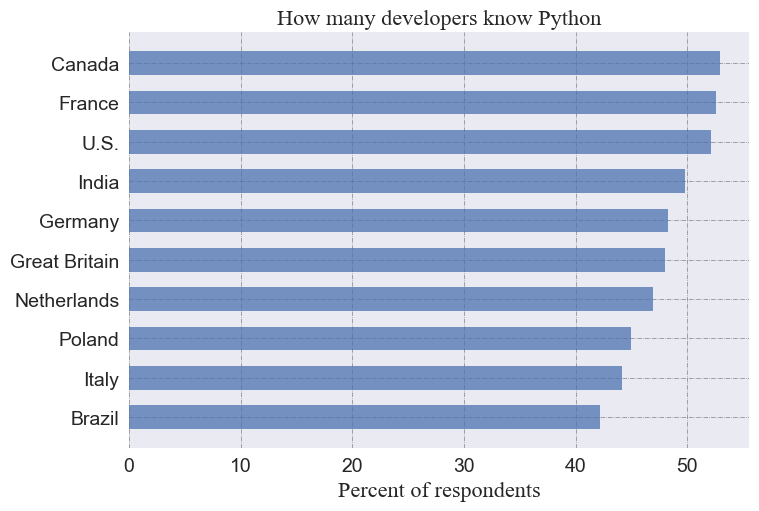

In [222]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5.5), dpi=100)
plt.barh(country, percent_know_python, height=0.6, alpha=0.75)
plt.title("How many developers know Python", fontname="Times New Roman", fontsize=16)
plt.xlabel("Percent of respondents", fontname="Times New Roman", fontsize=16)
plt.grid(color='gray', linestyle='-.', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
